<a href="https://colab.research.google.com/github/GiovanaRFatec/FATEC_MINERACAO_DADOS_2SEM2024/blob/master/Giovana_Maria_Tereza_RamosA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE P1**
Aluna: Giovana Maria Tereza Ramos - DSM 6º Semestre
## Análise Exploratória de Dados

Links deste exercício:
- https://www.kaggle.com/datasets/zynicide/wine-reviews
- https://seaborn.pydata.org/
- https://www.wine-searcher.com/critics-17-wine+enthusiast

Fomos contratados por uma grande empresa distribuidora de vinhos. Nosso cliente deseja melhorar as vendas entregando produtos que agradem os diversos perfis de clientes. O foco do nosso projeto aqui é desenvolver uma análise exploratória nos [dados de avaliações de vinhos](https://www.kaggle.com/datasets/zynicide/wine-reviews).

Uma análise exploratória bem elaborada consiste em algumas etapas:

- Compreensão do negócio
- Compreensão dos dados
- Preparar os dados (limpeza e tratamento)
- Análise de dados (extrair informações relevantes e responder perguntas)
- Avaliação dos resultados

Nosso objetivo ao concluir esse projeto é responder as seguintes perguntas:

1. De onde vem o melhor vinho ?
2. O preço do vinho está relacionado com a qualidade ?
3. Certas variedades de uvas são de maior qualidade ?
4. Qual é o melhor vinho em cada faixa de preço ?
5. Que palavras são mais utilizadas para descrever um vinho ?

Vamos começar!

**Verificando os dados**

Agora que já sabemos que perguntas dveemos responder duurante a análise, vamos dar uma olhada nos dados. Começaremos com alguns imports:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Utilizaremos a biblioteca Searbon, uma opção de biblioteca para vizualização baseada na Matplotlib que fornece uam interface mais simples para plotar os gráficos (escrevemos menos códigos).

Vamos exarminar o dataset:

In [ ]:
df = pd.read_csv("/content/winemag-data-130k-v2.csv")
df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Mostrando somente os nomes das colunas

In [ ]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

Vamos elaborar um pequeno sumário para as colunas e ver o que iremos ultilizar emnossa analíse:



*   **Unnamed** - Parece ser uma coluna de índice que podemos remover
*   **Country** - país onde foi feito (interessante)
*   **Description** - descrição do vinho
*   **Designation** - vinhedo dentro da adega onde as uvas que fizeramo viho foram coletadas
*   **Points** - é o número de pontos que o vinho obeteve em sua avaliação (precisamos entender a escala de pontos)
*   **Price** - preço da garrafa de vinho
*   **Province** - é a região onde o vinho foi feito
*   **Region-1** - é a região onde o vinho foi feito
*   **Region-2** - região mais especifica dentro de uma vitícol (podemos remover isso)
*   **Taster_name** - nome do revisor
*   **Taster_twitter_handle** - perfil do twitter do avaliador
*   **Title** - nome do vinho analisado (o ano de fabricação está no título)
*   **Variety** - tipo de uvas utilizdas na fabricação do vinho
*   **Winery** - adega onde o vinho foi feito

Agora, uma olhada rápida nos tipos de dados:












In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Ao todo temos 129.971 linhas no dataset. Existem algumas colunas com dados ausentes e podemo descartar algumas dessas colunas, como por exemplo region_2, taster_name e tarter_handle.

Vamos faer uma pré análise estatísticas dos valores numéricos de nosso dataframe com o comando describe()

In [ ]:
 df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

O describe() nos mostra uma distribuição de **pontos** para uma garrrafa de vinho, onde o **mínimo é 80** e** o máximo é 100**. Também é possível notar que a garrafa de vinho mais barata custa  **$4**  e a mais cara **$3.300**. Segundo esse site temos a seguinte classiifcação por pontos:



*  **98–100** – Classic
*   **94–97** – Superb
*   **90-93** – Excellent
*   **87–89** – Very good
*   **83–86** – Good
*   **80–82** – Acceptable

Por meio da função value_counts() podemos contar quantos vinhos foram avaliados por cada país:

In [ ]:
df["country"].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia                       12
Czech Republic               12
Macedonia                    12
Cyprus                       11
India                         9
Switzerland                   7
Luxembourg                    6
Bosnia and Herzegovina        2
Armenia                       2
Slovakia                      1
China                         1
Egypt                         1
Name: count, dtype: int64

Note que a maioria dos vinhos avaliados é dos **EUA, França, Itália, Espanha e Potugual**

Também podemos utilizar a value_counts para veriificar quais tipos de uva foram mais utilizadas na fabricação dos vinhos e avaliados:

In [ ]:
df["variety"].value_counts()

variety
Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: count, Length: 707, dtype: int64

Nossa próxima tarefa é limpar os dados que veficamos podemos concluir que o campos: unamed: 0, designation, region_1, region_2, taster_name e twitter_handle podem ser removidos, pois **nao fornecem dsdos úteis para nossa análise**

**Limpando os dados**

A primeira coisa a ser feita no processo de  limpeza de dados é cópia do DataFrame. Em seguida vamos remover as colunas que não iremos utilizar e tratar os problemas identificados:


In [ ]:
df1 = df.copy()

Agora que fizemos a cópia, vamos começar removendo as colunas que não vamos precisar para nossa análise:

In [ ]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)
df1.head()

country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   
2        US  Tart and snappy, the flavors of lime flesh and...      87   14.0   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   13.0   
4        US  Much like the regular bottling from 2012, this...      87   65.0   

            province                                              title  \
0  Sicily & Sardinia                  Nicosia 2013 Vulkà Bianco  (Etna)   
1              Douro      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2             Oregon      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3           Michigan  St. Julian 2013 Reserve Late Harvest Riesling ...   
4             Oregon  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

Ainda temos o problema dos dados ausentes para resolver:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Podemos fazer alguns cálculos de proproção an coluna de preço (que é bastante importante para nossa análise) e apresenta dados ausentes:

In [ ]:
df1.shape

(129971, 8)

In [ ]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


ok, se removermos as linhas com valores nulos da coluna prço (price), ficaremos com 93% das linhas restantes. Como a base de dados é suficiente garnde, podemos remover essas linhas filtrando também por país e uvas (country e variety) que tambénm contém dados nulos

In [ ]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


Agora nosso DataFrame está sem nulos e ponto para a etapa de análise

**Análise Exploratória**

Sempre que houver dúvidas por onde começar, visualize os dados! Vamos olar para a distribuição dos pontos dados durante as avaliações dos vinhos, parece um bom poonto de partida.

Text(0, 0.5, 'Frequência')

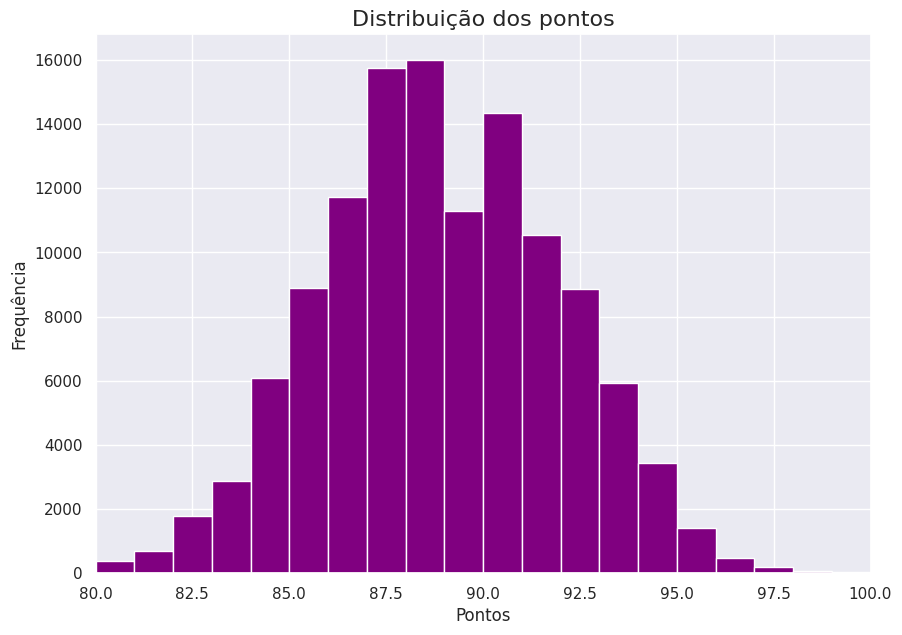

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(data=df1, x='points',
         bins=np.arange (80, df1['points'].max()+1, 1),
         color = 'purple')

plt.xlim(80,100)
plt.title('Distribuição dos pontos', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Frequência')

Existe uma distribuição quase normal dos pontos vrinado a escala entre 80 e 100. Vamos ver quais países estão no Top 10 que mais produzem vinhos

In [ ]:
country_top_10 = df1["country"].value_counts()[:10]
country_top_10

country
US           54265
France       17776
Italy        16914
Spain         6573
Portugal      4875
Chile         4415
Argentina     3756
Austria       2799
Australia     2294
Germany       2120
Name: count, dtype: int64

Com base nessse filtro podemos gerar um gráfico para comparar os países que mais tiveram vinhos avaliados:

Text(0, 0.5, 'Total de avaliação')

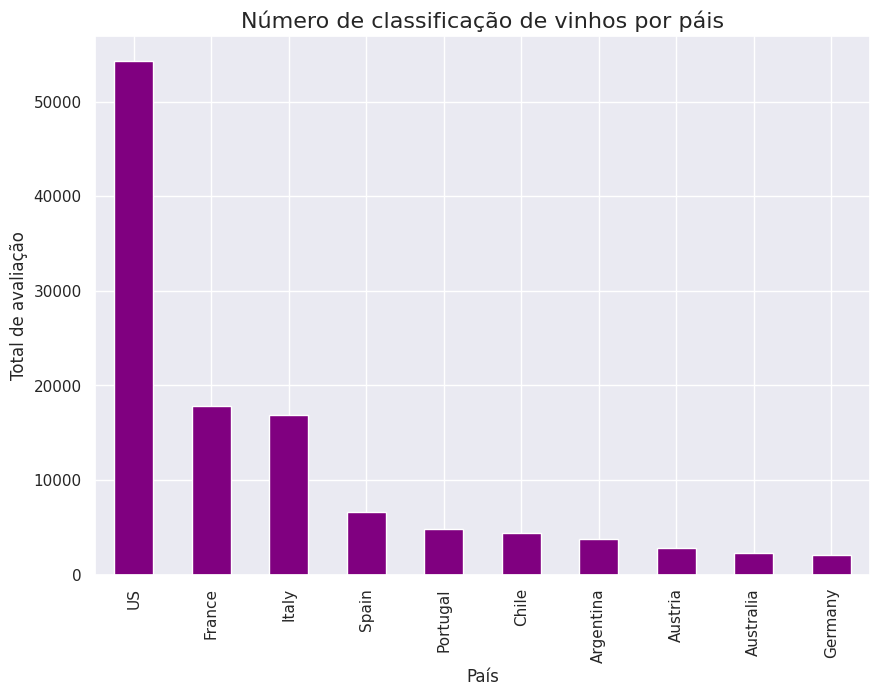

In [ ]:
plt.figure(figsize=(10,7))
country_top_10.plot(kind='bar', color = 'purple')

plt.title('Número de classificação de vinhos por páis', fontsize=16)
plt.xlabel('País')
plt.ylabel('Total de avaliação')

Com base nessa ordem do gráfico acima, vamos inventigar quantos países produzem vinho de melhor qualidade de acordo com as classificações.

In [ ]:
melhor_qualidade = df1.groupby("country")['points'].agg("mean")
melhor_qualidade = melhor_qualidade.sort_values(ascending=False)[:10]

melhor_qualidade.to_frame().style.background_gradient(cmap='Purples', high=0.5)

Podemos gerar um gráfico desse filtro

<ipython-input-18-706f178b5113>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'Páis')

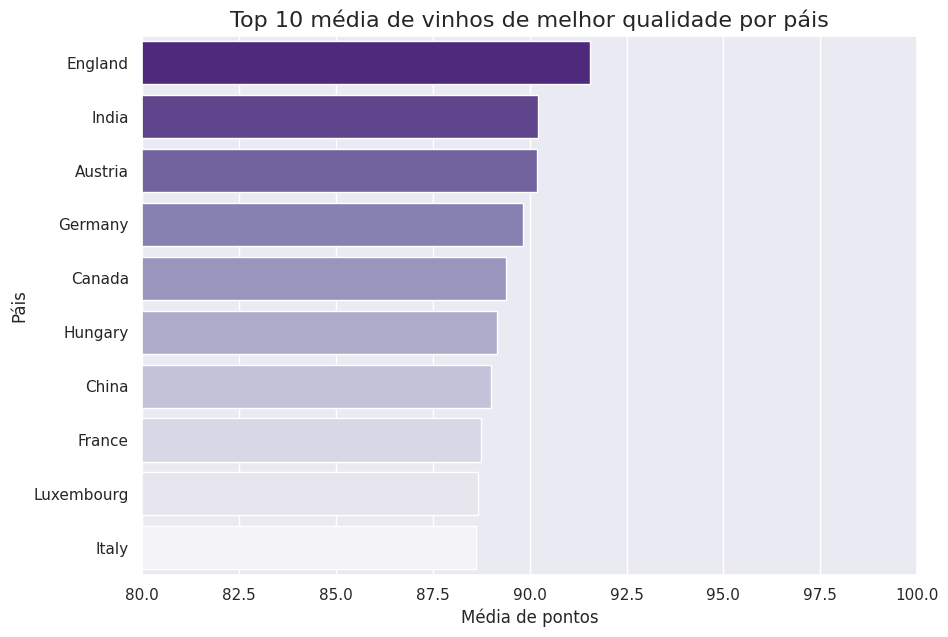

In [ ]:
y = melhor_qualidade.index.to_series()
x = melhor_qualidade

plt.figure(figsize=(10,7))
plt.xlim(80,100)
sns.barplot(x=x, y=y, palette='Purples_r')
plt.title('Top 10 média de vinhos de melhor qualidade por páis', fontsize=16)
plt.xlabel('Média de pontos')
plt.ylabel('Páis')

Ao verificar a média de pontos, podemos perceber que o país com melhor avaliação (que produziu o vinho de melhor qualidade) foi a Inglaterra. Isso occore, porque talvez haja vinhos da Inglaterra do nosso Dataframe e eles tenham uma pontuação alta, representando um aumento na média. Vale investiagarmos isso mais a fundo, podemos olhat países com pontuação acima de 95

In [ ]:
high_scores = df1[df1["points"]>=95]
high_scores["country"].value_counts()

country
US              991
France          509
Italy           326
Austria         103
Portugal         96
Germany          62
Spain            51
Australia        47
Argentina        11
Hungary           5
England           3
South Africa      3
Chile             2
New Zealand       2
Name: count, dtype: int64

Os países com classificação mais alta 95-100 pontos, diferem do nosso gráfico d epontuação mais altas com base nas  médias. Podemos criar um gráfico do tió boxplot que nos permitirá ver o máximo, o mínimo e a média daspontuações por cada páis. Como essa base de dados apresenta mais vinhos avaliados dos EUA, é provável que haja uma grande variedade de vinhos do páis, enquanto a Inglaterra, que teve a melhor pontuação média, apresenta menos vinhos na base de dados, o que resulta em uma comparação injusta.

Text(0, 0.5, 'Páis')

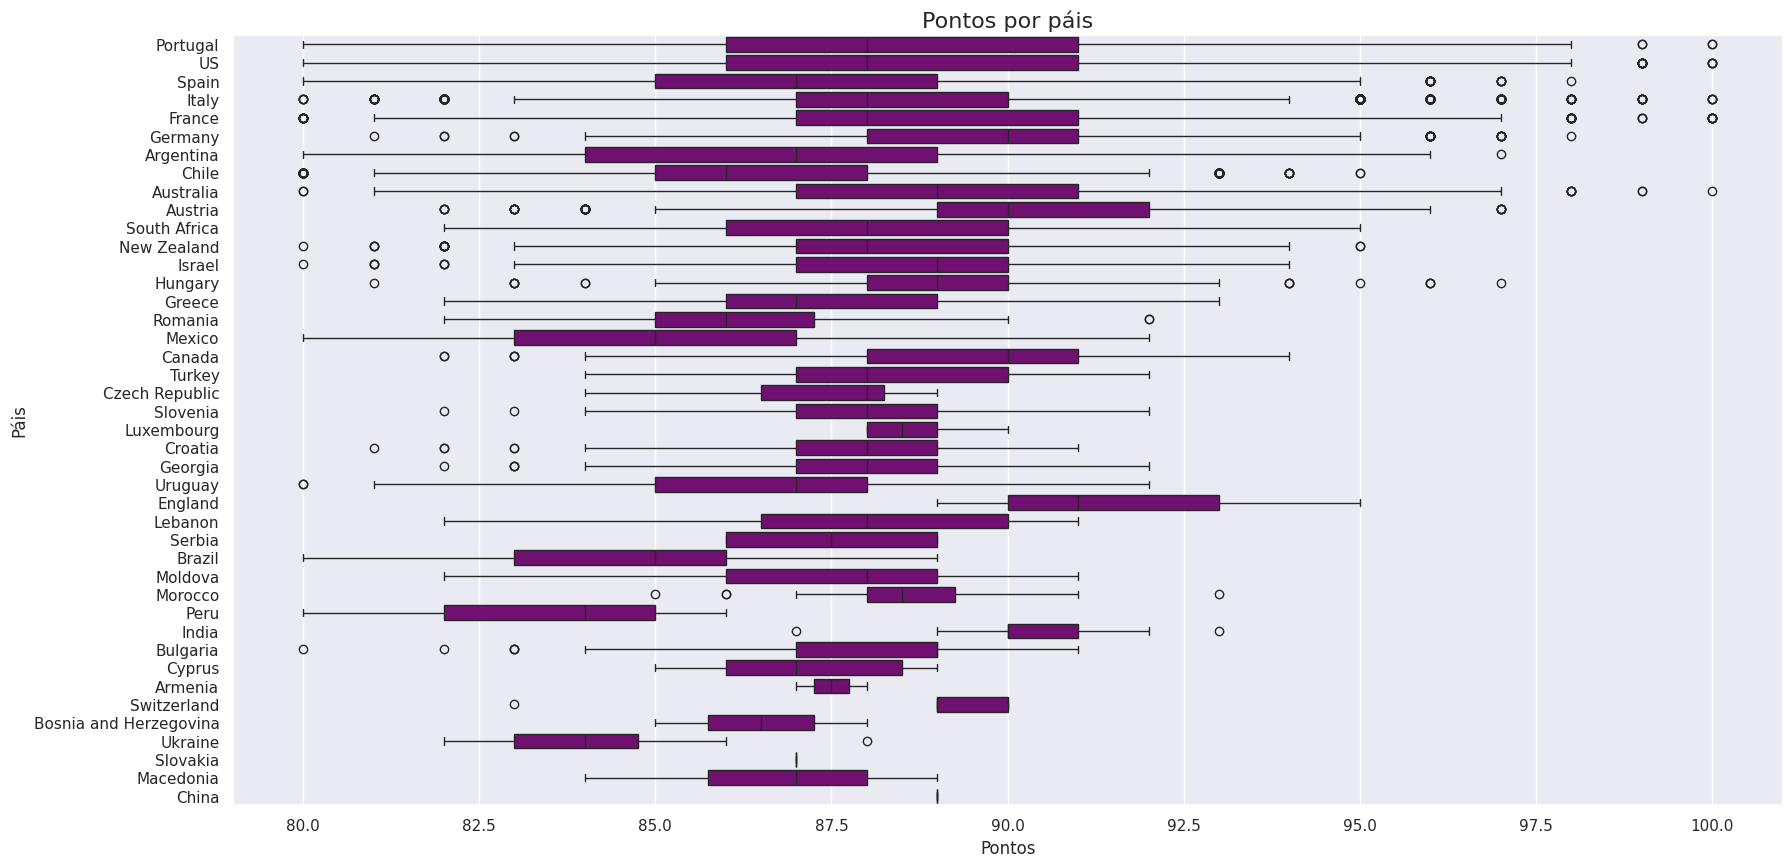

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1, x='points', y='country', color= 'Purple')

plt.title('Pontos por páis', fontsize=16)
plt.xlabel('Pontos')
plt.ylabel('Páis')

Embora os vinhos da Inglaterra tenham os pontos mais latos em média, os vinhos de Portugal, EUA, Itália, França e Austrália, receberam uma pontuação perfeita de 100. Há mais vinhos desses países na base de dados, portanto eles receberam uma gama maior de pontos.
OK, agora que vimos as distribuições de pontos por cada país, vamos investigar o preço do vinho nos países:

<ipython-input-21-a4b5695dd56f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Purples_r')


Text(0, 0.5, 'Páis')

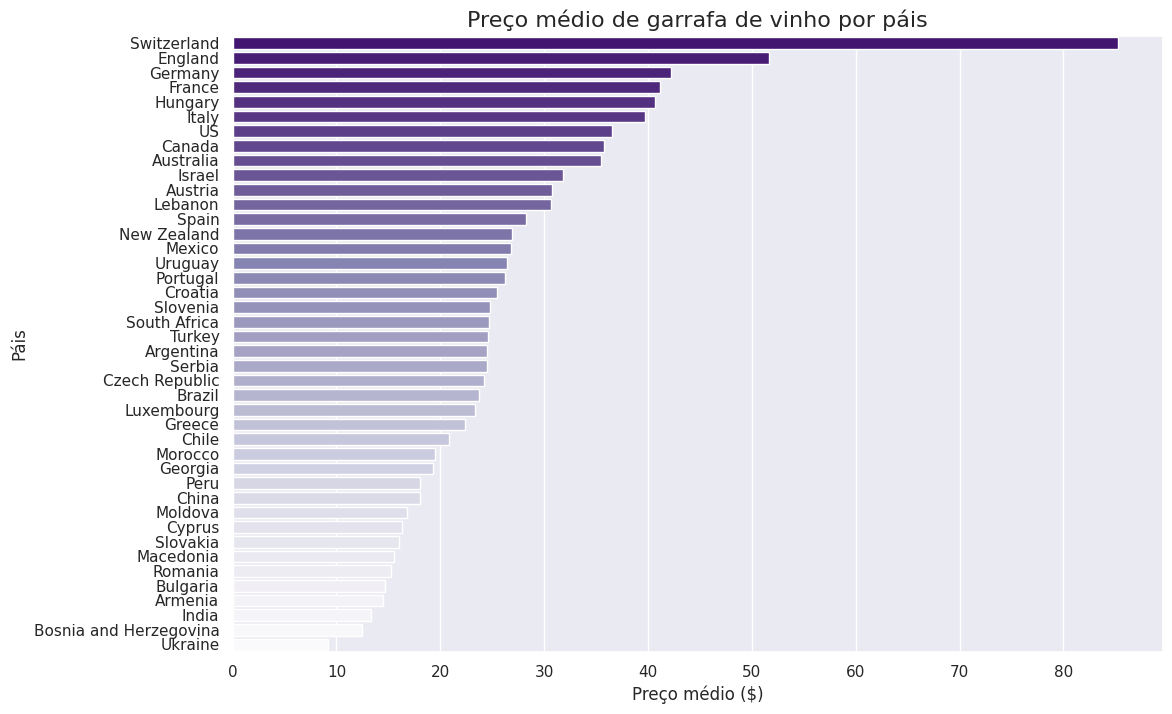

In [ ]:
average_price = df1.groupby("country")['price'].mean()
average_price = average_price.sort_values(ascending=False)
y = average_price.index.to_series()
x = average_price.values

plt.figure(figsize=(12,8))
sns.barplot(x=x, y=y, palette='Purples_r')

plt.title('Preço médio de garrafa de vinho por páis', fontsize=16)
plt.xlabel('Preço médio ($)')
plt.ylabel('Páis')

A Suiça, produz o vinho mais caro, com o preço médio de garrafa mais de $80. Já  o  vinho  a  Ucrãnia, está no outro estremo, com o preço médio mais baixo, $10 a garrafa. Vamos investigar se o peço está relacionado a qualidade do vinho. A utilização de histogramas para essa tarefa parece um bom plano:

Text(0, 0.5, 'Páis')

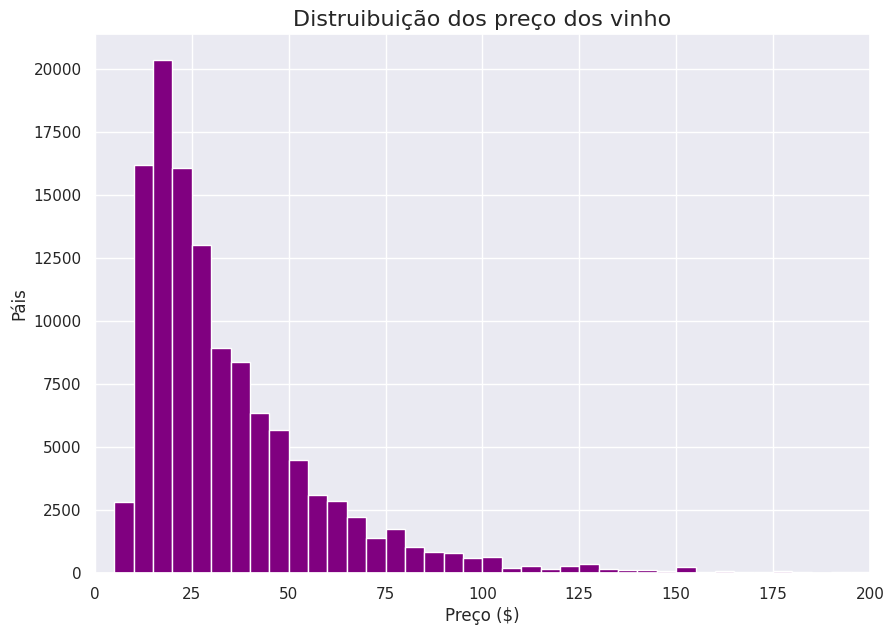

In [ ]:
plt.figure(figsize=(10,7))
bins = np.arange (0, df1["price"].max()+5, 5)
plt.hist(data=df1, x='price', bins=bins, color= 'Purple')
plt.xlim(0,200)
plt.title('Distruibuição dos preço dos vinho', fontsize=16)
plt.xlabel('Preço ($)')
plt.ylabel('Páis')

Interessante, os dados de preço dos vinhos apresentam uma distorção grande para a direita. Nessa caso precisamos de uma transformação logarítimica nos dados;

In [ ]:
df1["price"].describe()

count    120915.000000
mean         35.368796
std          41.031188
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [ ]:
np.log10(df1["price"].describe())

count    5.082480
mean     1.548620
std      1.613114
min      0.602060
25%      1.230449
50%      1.397940
75%      1.623249
max      3.518514
Name: price, dtype: float64

Agora utilizando os dados com as tranformações logarítimica para o nosso histograma:

Text(0, 0.5, 'Frequência')

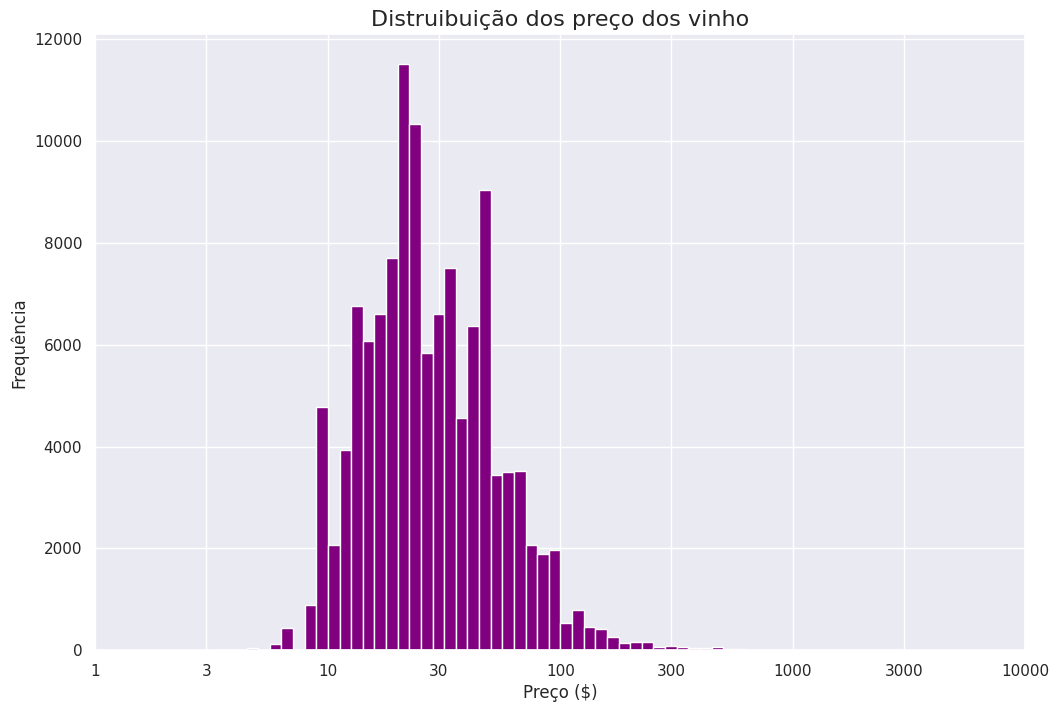

In [ ]:
plt.figure(figsize=(12,8))
bins = 10 ** np.arange(0.5, 3.5 + 0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.hist(data=df1, x='price', bins=bins, color= 'Purple')
plt.title('Distruibuição dos preço dos vinho', fontsize=16)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Preço ($)')
plt.ylabel('Frequência')

Bem melhor! Agora é possível ver uma distribuição (quase normal). Existem um salto na região dos 10 dólares e um pico mais vísivel em pouco mais de 20 dólares. Depois temos outro pico acima de $50. Agora podemos plotar um gráfico do tipo scatter para visuzalizar se existe uma correlaçõ entre a pontuação e o valor da garrafa

Text(0, 0.5, 'Pontos')

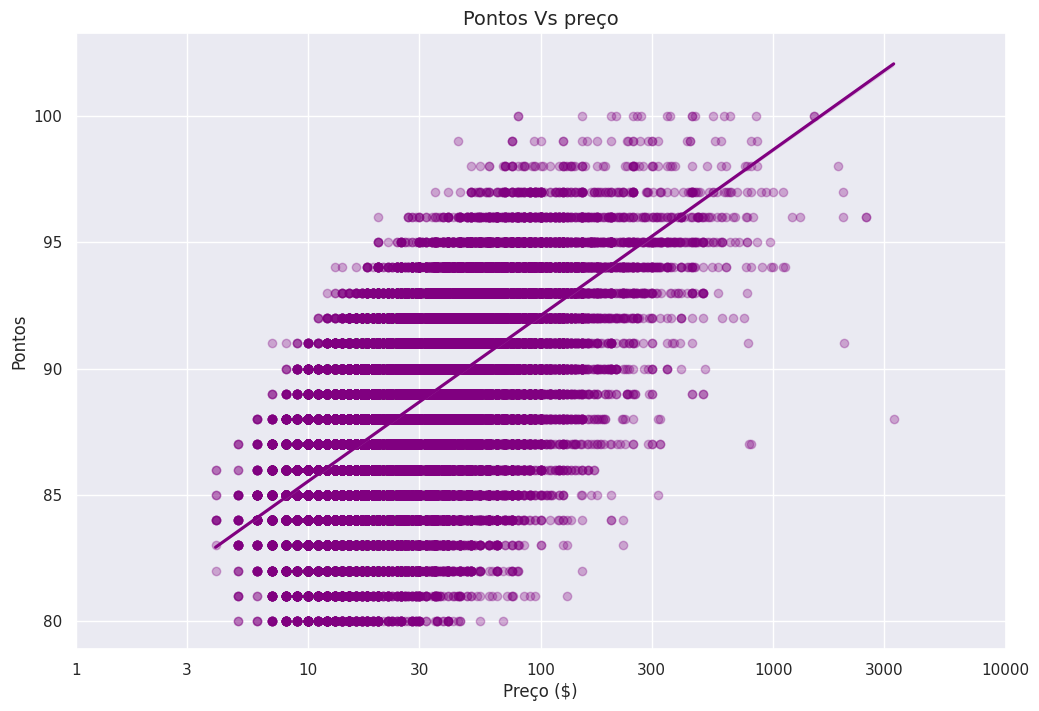

In [ ]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]

plt.figure(figsize=(12,8))
sns.regplot(x='price', y='points', data=df1, color='Purple', logx=True, scatter_kws={'alpha':0.3})
plt.title('Pontos Vs preço', fontsize=14)
plt.xscale('log')
plt.xticks(x, x)
plt.xlabel('Preço ($)')
plt.ylabel('Pontos')

O gráfico nos mostra uam relação positiva entre duas variáveis (pontuação e preços), ou seja vinhos mais carostendem a receber melhores avaliações. Também é possível observar dois poontos mais afastadoa, um na região dos $4 e outro depois de $3000. Vamos listar esses dois valores par descobrir quais vinhos são esses, buscando pelo valor máximo e mínimo:

In [ ]:
df1[df1["price"] == df1["price"].min()][:1]

country                                        description  points  \
1987   Spain  Berry and cherry aromas are surprisingly sturd...      85   

      price       province                                              title  \
1987    4.0  Central Spain  Felix Solis 2013 Flirty Bird Syrah (Vino de la...   

     variety       winery  
1987   Syrah  Felix Solis

In [ ]:
df1[df1["price"] == df1["price"].max()][:1]

country                                        description  points  \
80290  France  This ripe wine shows plenty of blackberry frui...      88   

        price  province                                 title  \
80290  3300.0  Bordeaux  Château les Ormes Sorbet 2013  Médoc   

                        variety                    winery  
80290  Bordeaux-style Red Blend  Château les Ormes Sorbet

Temos m vinho Espanhol com 85 pontos de classificação que custa $4 a garrafa e um vinho Frânces de 88 pontos que custa $3.300. Agora vamos investigar se certas variedades de vinhos (tipos de uva) são de mlehor qualidade. Para isso podemos filtrar uma amostra de 20 melhores vinhos e ver como eles pontuam.

In [ ]:
df1["variety"].value_counts()[:20]

variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: count, dtype: int64

Lembre-se vizualize os dados!

Vamos ao gráfico com boxplot!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Riesling'),
  Text(6, 0, 'Sauvignon Blanc'),
  Text(7, 0, 'Syrah'),
  Text(8, 0, 'Rosé'),
  Text(9, 0, 'Merlot'),
  Text(10, 0, 'Zinfandel'),
  Text(11, 0, 'Malbec'),
  Text(12, 0, 'Sangiovese'),
  Text(13, 0, 'Nebbiolo'),
  Text(14, 0, 'Portuguese Red'),
  Text(15, 0, 'White Blend'),
  Text(16, 0, 'Sparkling Blend'),
  Text(17, 0, 'Tempranillo'),
  Text(18, 0, 'Rhône-style Red Blend'),
  Text(19, 0, 'Pinot Gris')])

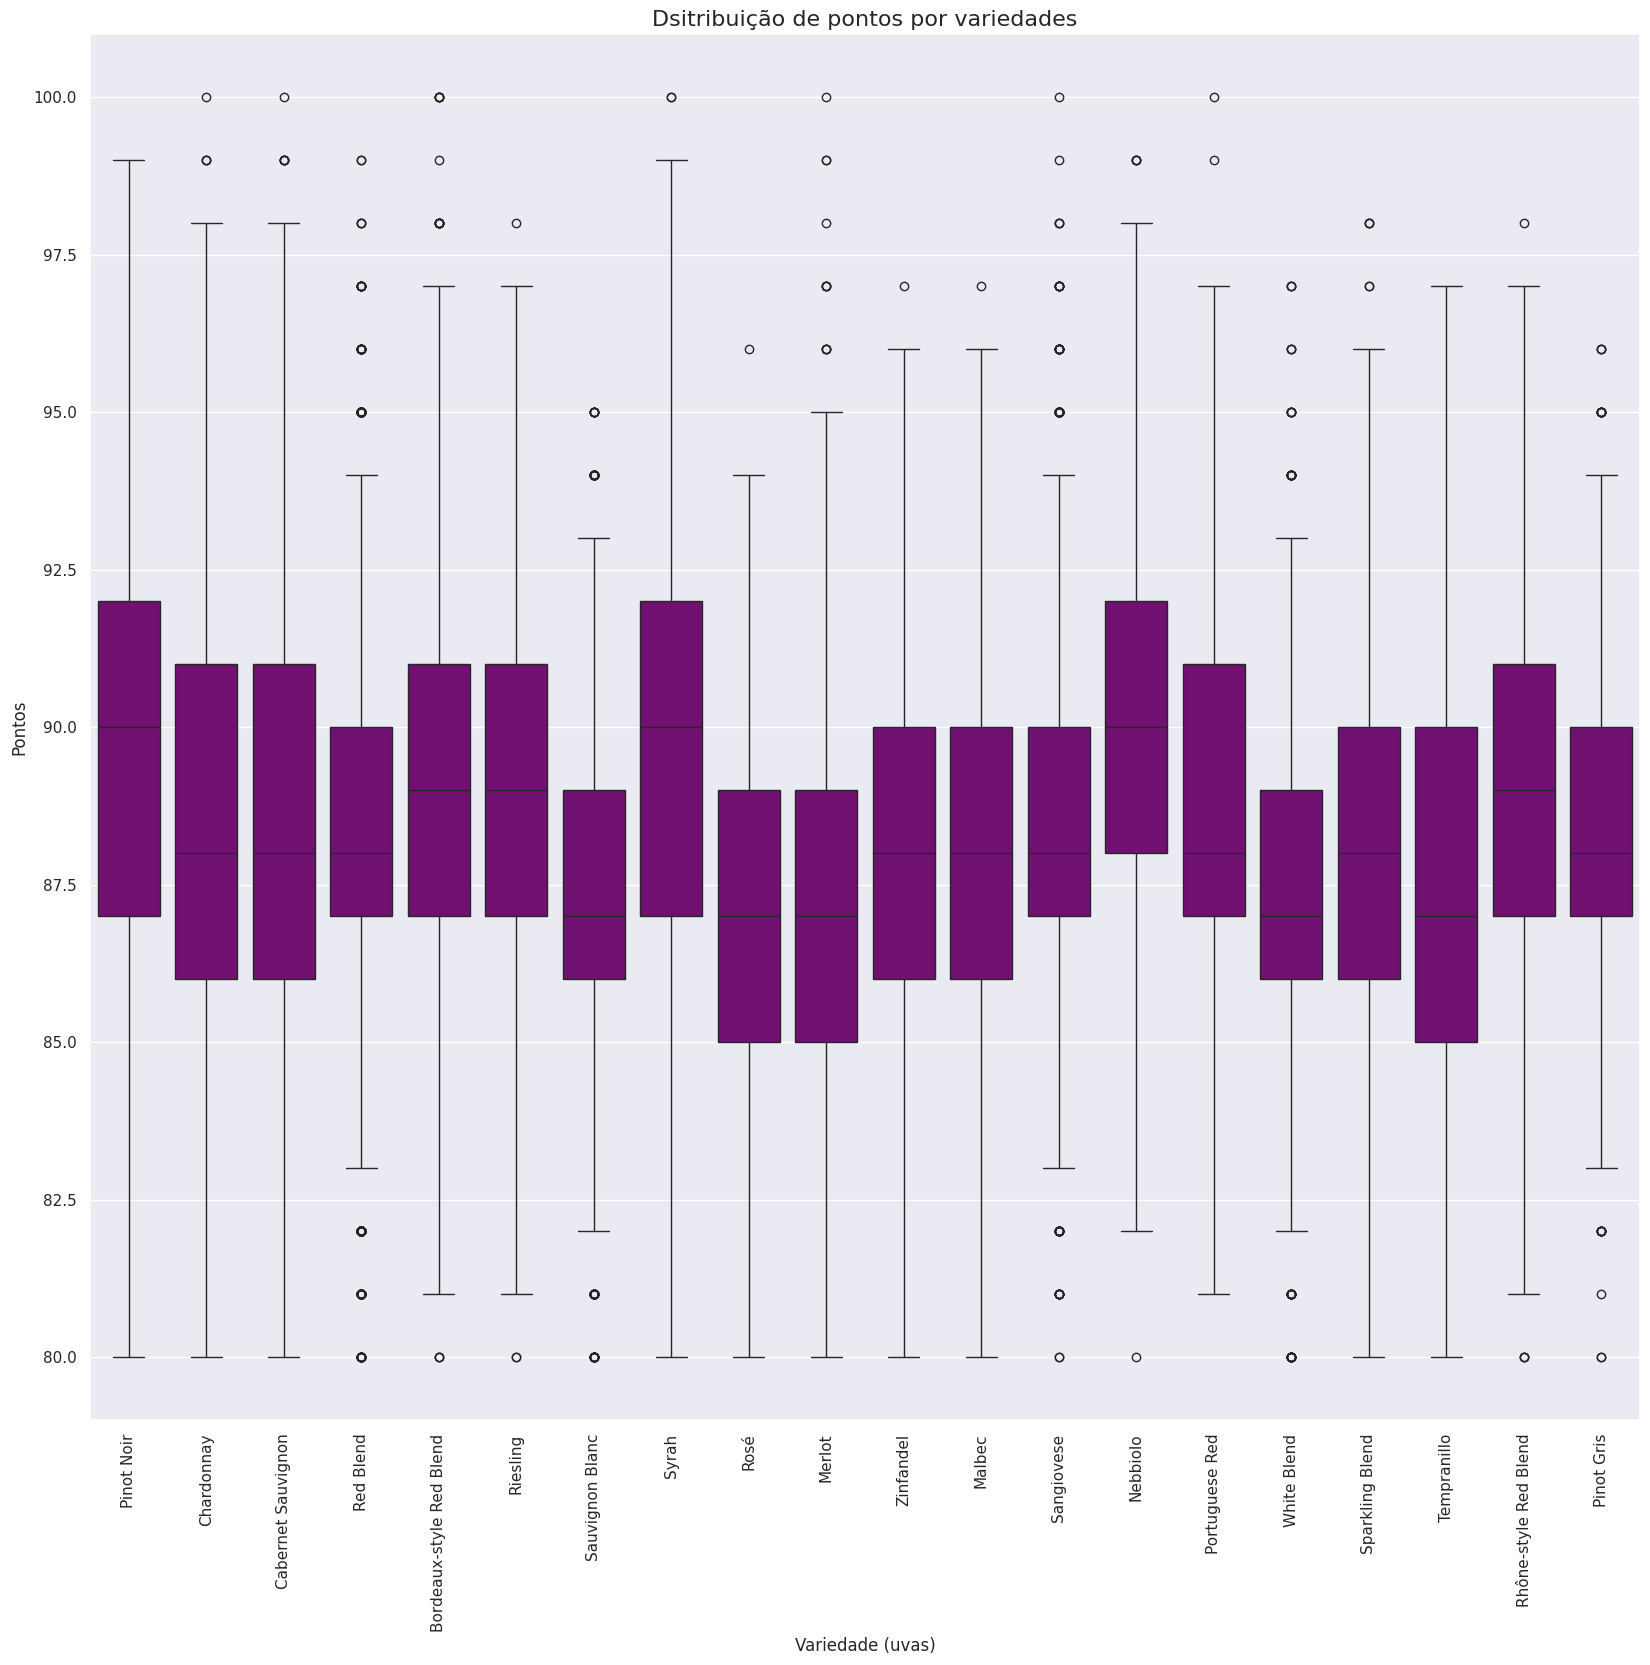

In [ ]:
plt.figure(figsize=(20,18))
sns.boxplot(data=df1,
            x='variety',
            y='points',
            color= 'Purple',
            order=df1["variety"].value_counts().iloc[:20].index)

plt.title('Dsitribuição de pontos por variedades', fontsize=16)
plt.xlabel('Variedade (uvas)')
plt.ylabel('Pontos')
plt.xticks(rotation=90)

Listando o **top 20** melhores vinhos (com melhores classificação) na base de dados vemos que a variedade Pinot Noir tende a ter um melhor desempenho com a pontuação média é mais alta.
 Já sabemos que a qualidade está fortemente relacionada ao preço mas nem todos os clientes podem gastar $3000 em uma garrafa de vinho toda semana nossa tarefa agora descobrir o melhor custo-benefício em algumas taxas de preço
*   até $15
*   entre $15 e $30
*   entre $30 e $50
*   acima de $50


 dólares

In [ ]:
under_15 = df1.drop(["description", "province", "winery"], axis=1)
under_15 = under_15[under_15["price"] <=15]
under_15 = under_15.sort_values(by="points", ascending=False)[:10]
under_15.style.background_gradient(cmap='YlOrRd', high=0.5, subset=["price"])

Com base nos dados, uma boa escolha aqui seria um vinho um vinho Português de 94 pontos po $13, Quinta dos Murças 2011 Assobio Red(Douro)

In [ ]:
between_30_and_50 = df1.drop(["description", "province", "winery"], axis=1)
between_30_and_50 = between_30_and_50.query("price > 30 and price <= 50")
between_30_and_50 = between_30_and_50.sort_values(by="points", ascending=False)[:10]
between_30_and_50.style.background_gradient(cmap='YlOrRd',high=0.5, subset=["price"])

Se a preferência do cliente for da variedade Chardonnay, nesse filtro é possível levar um inho de 99 pontos po $44,

In [ ]:
above_50 = df1.drop(["description", "province", "winery"], axis=1)
above_50 = above_50.query("price > 50")
above_50 = above_50.sort_values(by="points", ascending=False)[:10]
above_50.style.background_gradient(cmap='YlOrRd', high=0.5, subset=['price'])

Por $80, é possível experimentar o sabor de um vinho de 100 pontos, com duas opções: Charles Smith 2006 Royal city Sirah e Cayuse 2008 bionic frong e ambos dos EUA.
 Nossa última tarefa e análisa é descobrir quais palavras são mais utilizadas para escrever um vinho para isso podemos utilizar a biblioteca word cloud que separa cada palavra em um texto iniciante filtrar as maior ocorrência gerando uma nuvem de palavras primeiro vamos importar a biblioteca e combinar todas as descrições das avaliações em um texto só:

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

text = df1["description"][1]
text = "".join(i for i in df1["description"])
len(text)

29532296

Temos agora um imenso testo agrupado. A biblioteca disponíbilizara uma funcionalidade chamada stopwords que são uma lista d epalavras que  são serão eliminadas no processo de criação de uma nuvem de palavras

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2048,
                      height=1024,
                      max_words=1000).generate(text)

Com a nuvem de palavra pronta agora só porque ela plotar uma imagem exibindo as palavras mais utilizadas na descrição de vinhos :

(-0.5, 2047.5, 1023.5, -0.5)

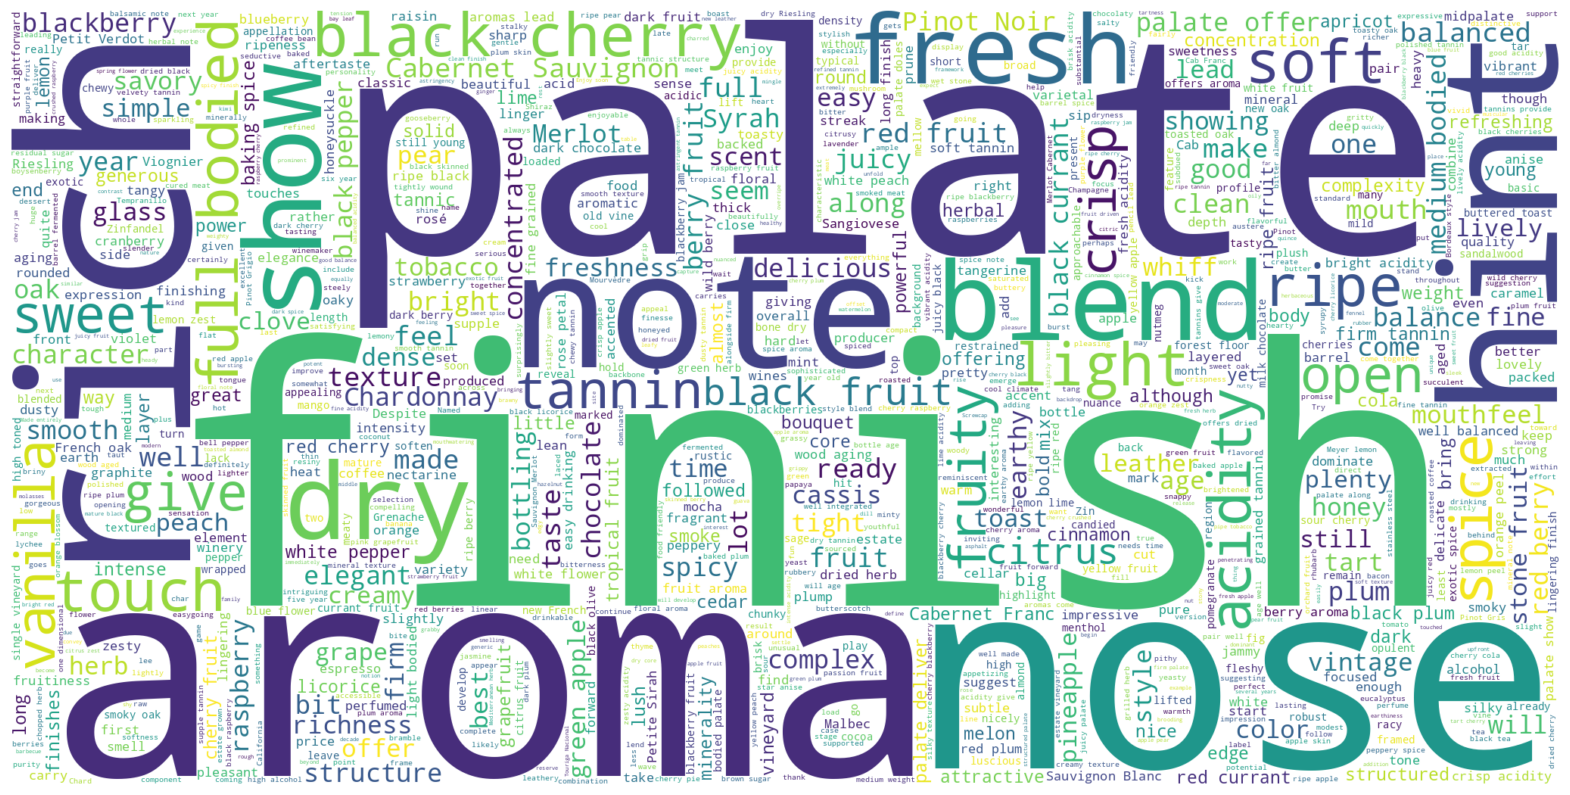

In [ ]:
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

Agora podemos finalmente responder as perguntas que recebemos no começo deste projeto;


*   **De onde vem o melhor vinho?**
*R:A Inglaterra que em média produz vinhos soberbos. Mas se você quiser uma garrafa com pontuação perfeita de 100 deve observar os vinhos de outros países França Itália Estados Unidos Portugal e Austrália*
*   **O preço do vinho está relacionado com a qualidade?**
*R:É nitido que o preço do vinho está relacionado com a qualidade mas se você souber onde procurar pode encontrar um vinho de $ 4 que possui apenas 3 pontos Baixos de uma garrafa que custa $ 3.3000
*   **Certas variedades de uva São maior de qualidade?**
*R:Todas as variedades são na mesma situação niveladas a maior oposta com base no dados é penho*
*   **Qual é o melhor vinho em cada faixa de preço?**
*R:Encontramos o vinho perfeito para cada orçamento com alguns destaques*
*   **Que palavras são mais utilizadas para escrever um livro?**
*R:Como podemos ver na nuvem de palavras certas termas aparecem uma vez e outra na descrições termos como finish pallet aparecem uma boa das avaliações*




**1º Pergunta**
Quais são os sabores e aromas mais comuns mencionados nas descrições de vinhos?

R: Exibimos a nuvem

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["wine", "flavor", "flavors", "aroma", "notes", "taste", "finish", "palate", "drink"])  # Adicione mais palavras conforme necessário


Gerando gráfico da resposta

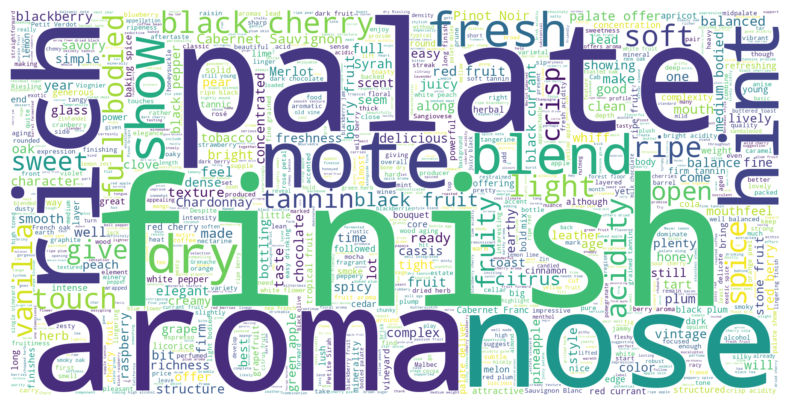

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**2º Pergunta**
Quais são os termos mais usados nas críticas de vinhos franceses (ou de outra região específica)?

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update([
    "wine", "flavor", "aroma", "notes", "taste", "finish", "palate", "drink",
    "France", "French", "vineyard", "region", "vintage", "bottle", "winemaker", "winery"
])

Gerando gráfico da resposta

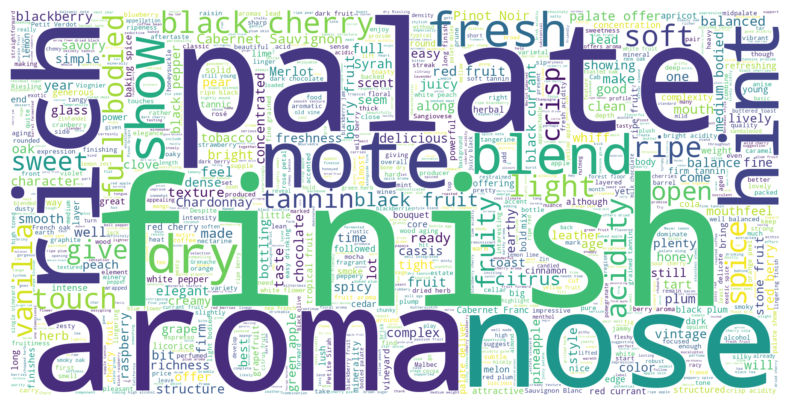

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**3º Pergunta**
Quais são os termos mais comuns nas resenhas dos vinhos com notas acima de 95 pontos?

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update([
    "wine", "flavor", "aroma", "notes", "taste", "finish", "palate", "drink",
    "vintage", "points", "winemaker", "winery", "bottle", "year", "score"
])

Gerando gráfico da resposta

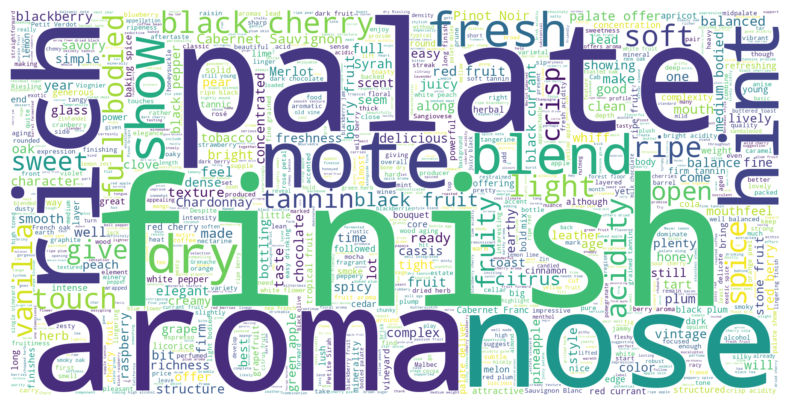

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()